In [1]:
import numpy as np
import matplotlib.pyplot as plt

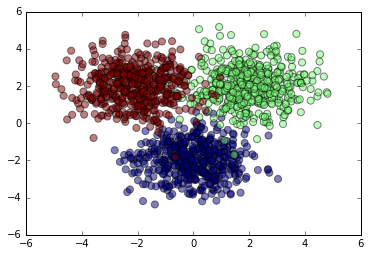

In [31]:
K = 3  # number of classes
Nclass = 500  # number of inputs per class
N = K * Nclass

# input
X1 = np.random.randn(Nclass,2) + np.array([0,-2])
X2 = np.random.randn(Nclass,2) + np.array([2,2])
X3 = np.random.randn(Nclass,2) + np.array([-2,2])
X = np.vstack([X1, X2, X3])
assert(len(X) == N)

# target
T = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
assert(len(T) == N)

# one-hot encoding
Y = np.zeros((len(T), len(set(T))))
Y[range(len(T)), T[range(len(T))]] = 1

# plot
plt.scatter(X[:,0], X[:,1], c=T, s=50, alpha=0.5)
plt.show()

In [46]:
# feed forward
def forward(X):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))  # hidden layer with sigmoid activation
    A = np.exp(Z.dot(W2) + b2)
    pY = A / A.sum(axis=1, keepdims=True)  # output layer with softmax activation
    return pY, Z


def predict(pY):
    That = np.argmax(pY, axis=1)  # t hat
    return That


def accuracy(That, T):
    return np.mean(That == T)

In [64]:
# initialise ann weights randomly
D = 2  # number of features
M = 3  # hidden layer with M neurons
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

# predict without training
pY, _ = forward(X)
accuracy(predict(pY), T)

0.042000000000000003

In [ ]:
# train via back propagation and gradient descent
def train(X, Y, learning_rate=0.1, epochs=1000):
    global W1, W2, b1, b2
    for epoch in range(epochs):
        pY, Z = forward(X)
        delta_out = pY - Y
        delta_hid = delta_out.dot(W2.T) * Z * (1 - Z) # valid for sigmoid activation
        W2 -= learning_rate / T.shape[0] * Z.T.dot(delta_out)
        b2 -= learning_rate / T.shape[0] * delta_out.sum(axis=0)
        W1 -= learning_rate / T.shape[0] * X.T.dot(delta_hid)
        b1 -= learning_rate / T.shape[0] * delta_hid.sum(axis=0)
        if not(epoch % 100):
            print str(epoch) + ': accuracy:' + str(accuracy(predict(pY), T))

In [66]:
# train
train(X, Y)

0: accuracy:0.042
100: accuracy:0.672
200: accuracy:0.894666666667
300: accuracy:0.961333333333
400: accuracy:0.971333333333
500: accuracy:0.974
600: accuracy:0.975333333333
700: accuracy:0.975333333333
800: accuracy:0.976
900: accuracy:0.975333333333
